In [2]:
# Create histograms comparing 2 sets of tracks (usually ants vs simulAnts)
# Inputs: 2 DataFrames of the tracks w/ x,y,t,id (to be selected below)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%run ../data_prep/trackfuns.py

In [3]:
# Import data
varNames = ['x','y','t','id']
dataPath1 = r'C:\Users\stpop\Documents\MATLAB\HRM_T2_ants' # ant data?
dataPath2 = r'C:\Users\stpop\Documents\MATLAB\HRM_T3_ants' # simulAnt data?

# Labels to be displayed in the legends
lab1 = 'Ants'
lab2 = 'SumulAnts'

dat1 = addMetrics(pd.read_csv(dataPath1+'.txt', usecols=varNames))
dat2 = addMetrics(pd.read_csv(dataPath2+'.txt', usecols=varNames))

ids1 = np.unique(dat1.id)
ids2 = np.unique(dat2.id)

# Equallizing #of tracks to make histograms comparable
if len(ids1) == len(ids2):
    print('Nr of tracks: ' + str(len(ids1)))
elif len(ids1)>len(ids2):
    print('\033[1;33m' + 'WARNING: Nr of tracks unequal! '+
          lab1+': ' + str(len(ids1)) + ', ' +
          lab2+': ' + str(len(ids2)) + '. Picked first ' + str(len(ids2)) + ' tracks of ' + lab1)
    idsMatch = ids1[:len(ids2)]
    dat1 = dat1[np.isin(dat1.id,idsMatch)]
else:
    print('\033[1;33m' + 'WARNING: Nr of tracks unequal! '+
      lab1+': ' + str(len(ids1)) + ', ' +
      lab2+': ' + str(len(ids2)) + '. Picked first ' + str(len(ids1)) + ' tracks of ' + lab2)
    idsMatch = ids2[:len(ids1)]
    dat2 = dat2[np.isin(dat2.id,idsMatch)]

In [4]:
# Calculates all summary metrics (from trackfuns.py)
dat1 = dat1[np.isin(dat1.id,ids1[:100])]
dat2 = dat2[np.isin(dat2.id,ids2[:100])]
sumStats1 = sum_stats(dat1)
sumStats2 = sum_stats(dat2)

In [6]:
sumStats1

,id,sMu,sSD,alphaMu,alphaSu,alphaSD,turnChg,MSD,nrCross,turnAcRho
0,1,1.800873,0.003312,0.042545,18.804876,17.989323,153.0,13748.879548,1.0,-0.194178
1,2,1.799736,0.004456,-0.021997,-27.078393,22.831555,461.0,149146.175093,4.0,-0.139739
2,3,1.799519,0.003238,-0.945311,-1160.841522,20.214713,410.0,37523.869872,6.0,-0.165784
3,4,1.800734,0.004338,-0.131950,-48.161647,20.424063,144.0,6073.027321,7.0,-0.123603
4,5,1.798950,0.003912,-1.097011,-436.610229,24.086897,124.0,4777.058598,4.0,-0.151007
...,...,...,...,...,...,...,...,...,...,...
95,96,1.801873,0.003784,0.516680,815.838309,21.431276,476.0,78517.908176,9.0,-0.131159
96,97,1.798994,0.003217,0.417644,473.190919,23.217716,402.0,8051.258550,33.0,-0.102147
97,98,1.798580,0.003272,-0.905529,-376.700026,28.347819,146.0,5449.265053,2.0,-0.177870
98,99,1.800007,0.003356,-0.990598,-459.637339,22.129956,159.0,11238.379447,3.0,-0.103751


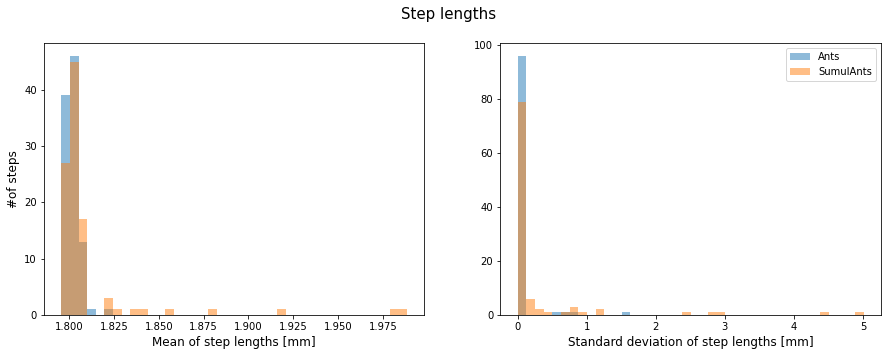

In [7]:
# Are step lengths the same (across all tracks)?
fig,ax = plt.subplots(1,2, figsize=(15,5))
bins=np.histogram(np.hstack((sumStats1.sMu,sumStats2.sMu)), bins=40)[1] #get the bin edges
ax[0].hist(sumStats1.sMu,bins, alpha=0.5)
ax[0].hist(sumStats2.sMu,bins,alpha=0.5)
ax[0].set_ylabel('#of steps', fontsize=12)
ax[0].set_xlabel('Mean of step lengths [mm]', fontsize=12)

bins=np.histogram(np.hstack((sumStats1.sSD,sumStats2.sSD)), bins=40)[1] #get the bin edges
ax[1].hist(sumStats1.sSD,bins,alpha=0.5, label=lab1)
ax[1].hist(sumStats2.sSD,bins,alpha=0.5, label=lab2)
ax[1].set_xlabel('Standard deviation of step lengths [mm]', fontsize=12)
ax[1].legend()
plt.suptitle('Step lengths',fontsize=15)
plt.show()

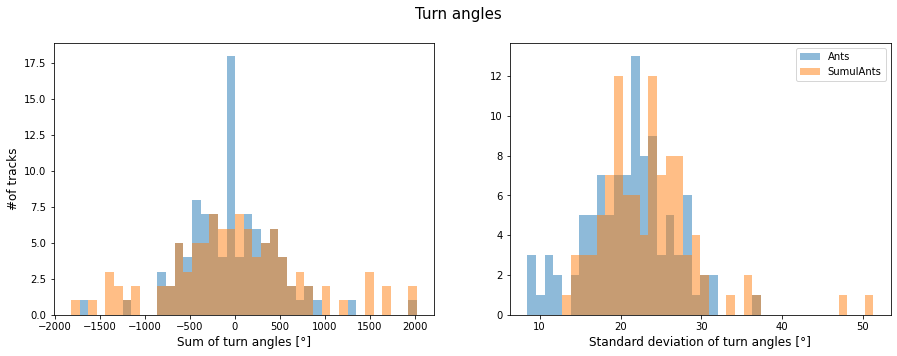

In [9]:
# Are turn angles the same (across all tracks)?
fig,ax = plt.subplots(1,2, figsize=(15,5))
bins=np.histogram(np.hstack((sumStats1.alphaSu,sumStats2.alphaSu)), bins=40)[1] #get the bin edges
ax[0].hist(sumStats1.alphaSu, bins, alpha=0.5)
ax[0].hist(sumStats2.alphaSu, bins, alpha=0.5)
ax[0].set_ylabel('#of tracks', fontsize=12)
ax[0].set_xlabel('Sum of turn angles [°]', fontsize=12)

bins=np.histogram(np.hstack((sumStats1.alphaSD,sumStats2.alphaSD)), bins=40)[1] #get the bin edges
ax[1].hist(sumStats1.alphaSD,bins,alpha=0.5, label=lab1)
ax[1].hist(sumStats2.alphaSD,bins,alpha=0.5, label=lab2)
ax[1].set_xlabel('Standard deviation of turn angles [°]', fontsize=12)
ax[1].legend()
plt.suptitle('Turn angles',fontsize=15)
plt.show()

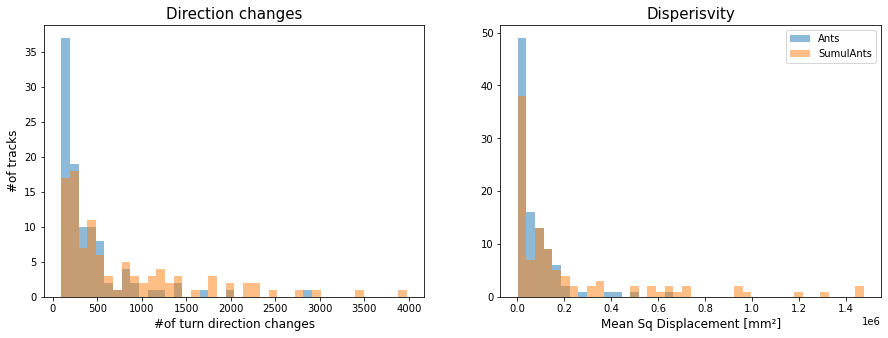

In [10]:
# #of turn direction changes & MSD
fig,ax = plt.subplots(1,2, figsize=(15,5))
bins=np.histogram(np.hstack((sumStats1.turnChg,sumStats2.turnChg)), bins=40)[1] #get the bin edges
ax[0].hist(sumStats1.turnChg, bins, alpha=0.5)
ax[0].hist(sumStats2.turnChg, bins, alpha=0.5)
ax[0].set_ylabel('#of tracks', fontsize=12)
ax[0].set_xlabel('#of turn direction changes', fontsize=12)
ax[0].set_title('Direction changes',fontsize=15)

bins=np.histogram(np.hstack((sumStats1.MSD,sumStats2.MSD)), bins=40)[1] #get the bin edges
ax[1].hist(sumStats1.MSD,bins,alpha=0.5, label=lab1)
ax[1].hist(sumStats2.MSD,bins,alpha=0.5, label=lab2)
ax[1].set_xlabel('Mean Sq Displacement [mm\u00b2]', fontsize=12)
ax[1].set_title('Disperisvity',fontsize=15)
ax[1].legend()
plt.show()

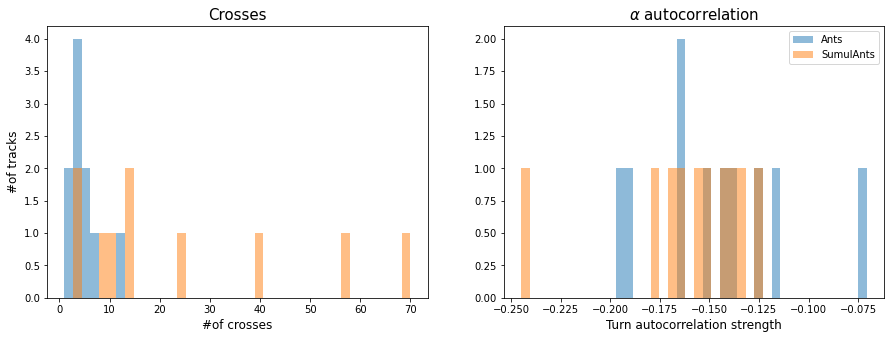

In [6]:
# #of crosses & turn autocorrelation
fig,ax = plt.subplots(1,2, figsize=(15,5))
bins=np.histogram(np.hstack((sumStats1.turnAcRho,sumStats2.nrCross)), bins=40)[1] #get the bin edges
ax[0].hist(sumStats1.nrCross, bins, alpha=0.5)
ax[0].hist(sumStats2.nrCross, bins, alpha=0.5)
ax[0].set_ylabel('#of tracks', fontsize=12)
ax[0].set_xlabel('#of crosses', fontsize=12)
ax[0].set_title('Crosses',fontsize=15)

bins=np.histogram(np.hstack((sumStats1.turnAcRho,sumStats2.turnAcRho)), bins=40)[1] #get the bin edges
ax[1].hist(sumStats1.turnAcRho,bins,alpha=0.5, label=lab1)
ax[1].hist(sumStats2.turnAcRho,bins,alpha=0.5, label=lab2)
ax[1].set_xlabel('Turn autocorrelation strength', fontsize=12)
ax[1].set_title(r'$\alpha$ autocorrelation',fontsize=15)
ax[1].legend()
plt.show()